In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.array([[40, 20],
                [55, 30],
                [70, 60],
                [50, 35],
                [45, 40],
                [62, 75],
                [45, 30],
                [68, 80],
                [80, 70],
                [75, 90]])

In [3]:
data

array([[40, 20],
       [55, 30],
       [70, 60],
       [50, 35],
       [45, 40],
       [62, 75],
       [45, 30],
       [68, 80],
       [80, 70],
       [75, 90]])

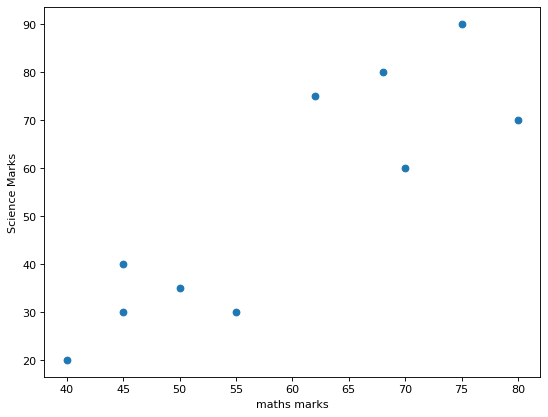

In [12]:
from matplotlib.pyplot import figure
figure(figsize=(8,6),dpi=80)
plt.scatter(data[:,0],data[:,1])
plt.xlabel("maths marks")
plt.ylabel("Science Marks")
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data)
print(scaled_data)

[[-1.43299332 -1.39951173]
 [-0.3016828  -0.97541727]
 [ 0.82962771  0.29686613]
 [-0.67878631 -0.76337004]
 [-1.05588981 -0.5513228 ]
 [ 0.2262621   0.93300782]
 [-1.05588981 -0.97541727]
 [ 0.67878631  1.14505506]
 [ 1.58383472  0.72096059]
 [ 1.20673122  1.56914952]]


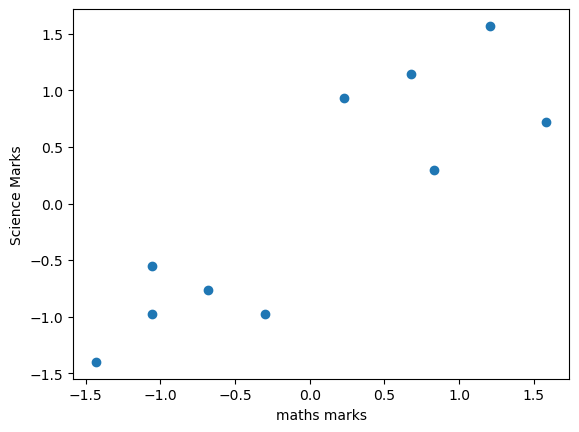

In [16]:
plt.scatter(scaled_data[:,0],scaled_data[:,1])
plt.xlabel("maths marks")
plt.ylabel("Science Marks")
plt.show()

In [17]:
from sklearn.decomposition import PCA

In [18]:
pca=PCA(n_components=2)
pca.fit(data)

PCA(n_components=2)

In [19]:
pca.explained_variance_

array([775.27373895,  37.83737216])

In [20]:
pca.explained_variance_ratio_

array([0.95346593, 0.04653407])

In [21]:
pca = PCA(n_components=1)
pca.fit(data)

PCA(n_components=1)

In [22]:
pca.explained_variance_

array([775.27373895])

In [23]:
data_pca = pca.transform(data)
print("Original shape:", data.shape)
print("Transformed shape:", data_pca.shape)

Original shape: (10, 2)
Transformed shape: (10, 1)


In [24]:
data

array([[40, 20],
       [55, 30],
       [70, 60],
       [50, 35],
       [45, 40],
       [62, 75],
       [45, 30],
       [68, 80],
       [80, 70],
       [75, 90]])

In [25]:
data_pca

array([[-38.04528819],
       [-22.24513011],
       [ 11.29118006],
       [-20.1217861 ],
       [-17.9984421 ],
       [ 20.8961837 ],
       [-26.86651814],
       [ 28.10305454],
       [ 24.78064413],
       [ 40.2061022 ]])

In [26]:
from matplotlib.pyplot import figure
figure(figsize=(8,6),dpi=80)
new_data=pca.inverse_transform(data_pca)

<Figure size 640x480 with 0 Axes>

In [27]:
new_data

array([[41.41779606, 19.26114913],
       [48.7196622 , 33.27284946],
       [64.21809244, 63.01310434],
       [49.70094186, 35.15584708],
       [50.68222152, 37.03884469],
       [68.65693732, 71.5308946 ],
       [46.58393947, 29.17456742],
       [71.98751198, 77.92200247],
       [70.45209722, 74.97566365],
       [77.58079994, 88.65507717]])

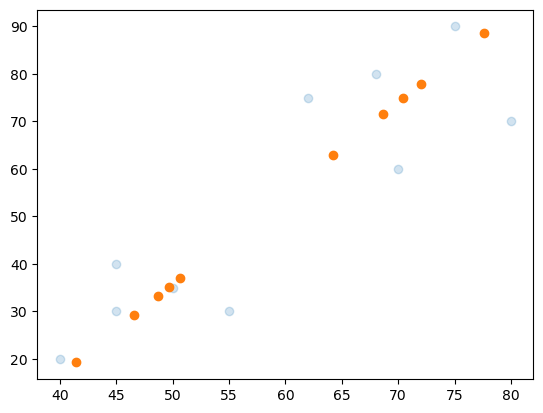

In [28]:
plt.scatter(data[:, 0], data[:, 1], alpha=0.2)
plt.scatter(new_data[:, 0], new_data[:, 1])

In [29]:
# PCA for visualization

In [30]:
from sklearn.datasets import load_digits

In [31]:
digits=load_digits()

In [32]:
digits.data.shape

(1797, 64)

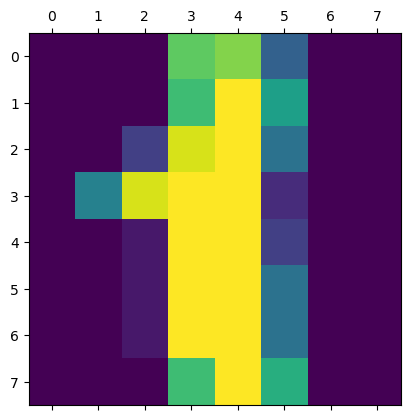

In [34]:
import matplotlib.pyplot as plt
plt.matshow(digits.images[1])
plt.show()

In [35]:
digits.target[1]

1

In [36]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
new_data = pca.fit_transform(digits.data)
print(digits.data.shape)
print(new_data.shape)

(1797, 64)
(1797, 2)


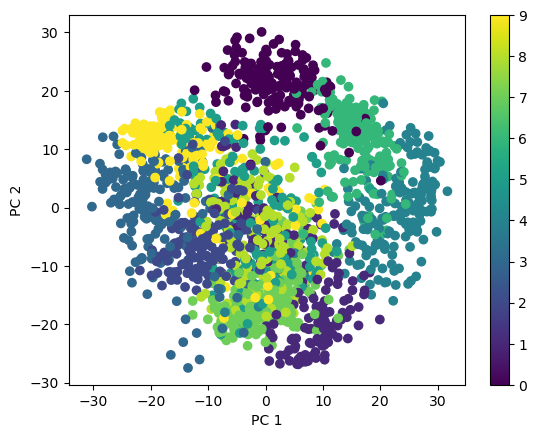

In [37]:
import matplotlib.pyplot as plt
plt.scatter(new_data[:, 0], new_data[:, 1], c=digits.target)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.colorbar()

In [38]:
# PCA for speedup model

In [39]:
from sklearn.datasets import load_digits
import numpy as np

In [40]:
digits = load_digits()
digits.data.shape

(1797, 64)

In [41]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
new_data = sc.fit_transform(digits.data)

In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)

In [43]:
new_data_pca = pca.fit_transform(new_data)

In [44]:
new_data_pca

array([[ 1.91409674, -0.95472263, -3.94576664, ...,  1.48860136,
         0.11852258, -0.82246309],
       [ 0.58888259,  0.92417945,  3.9248619 , ...,  0.53640863,
         1.06968626,  0.04262879],
       [ 1.30225271, -0.31689229,  3.02310363, ...,  1.16563158,
         0.83764224, -1.15429263],
       ...,
       [ 1.02300753, -0.14707584,  2.4693274 , ...,  0.55028894,
         2.06119226, -2.06185203],
       [ 1.07649584, -0.37991919, -2.45590322, ...,  0.80136438,
         1.11624078, -0.31085036],
       [-1.25695725, -2.22613945,  0.28264302, ..., -1.14846322,
         0.87616965, -1.84016715]])

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train, x_test, y_train, y_test = train_test_split(new_data_pca, digits.target, test_size=0.2, random_state=42)

In [47]:
x_train.shape

(1437, 10)

In [48]:
y_train.shape

(1437,)

In [49]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=1000)
import time

In [50]:
start = time.time()
model.fit(x_train, y_train)
end = time.time()
print('Time: ' + str((end - start)*1000) + ' ms')

Time: 115.86284637451172 ms


In [51]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

0.8972222222222223

In [52]:
print("Shape of the Data set : "+ str(new_data_pca.shape))

Shape of the Data set : (1797, 10)


In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(new_data_pca, digits.target, test_size=0.2, random_state=42)


In [54]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=1000)

In [55]:
import time
start = time.time()
model.fit(x_train, y_train)
end = time.time()

In [56]:

print('Time: ' + str((end - start)*1000) + ' ms')

Time: 100.28386116027832 ms
